<a id='intro'></a>
## Introduction

In this project, we will analyze the movie data set and get useful information regarding movie rating, genre, and many more factors. I will go through what are the highest budget/ Revenue/ profit movies, what are the most genres popularity, is there is a relationship between actress and profit, what is the relationship between vote average and movie genre, what is the relationship between vote average and production company.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# load the data and read it
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# look how many rows and columns data has.
df.shape

(10866, 21)

In [4]:
# look at the datatype for each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

we can see there is some missing values in tagkine, homepage, keywords, and production companies.

In [5]:
# see how many unique values each attribute has
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
# go through describtive statistic information.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* the mean average for budgting are around 1.5 million will the max are around 4.25 million, in addition vote verage around 6 and max is 9.2

In [7]:
# look at the number of null value in each column.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#Data Cleaning 

In this stage we going to clean data from unnessery data such as:

  1- Remove duplicated data.

  2- Change the release datatype into datatime.

  3- Remove attributes that is not relevant.

  4- Remove movies that has zero budget or Revnue.

**Remove Duplicated data.**

In [8]:
# look at how many duplicated rows
sum(df.duplicated())

1

In [9]:
# remove all duplicated rows
df.drop_duplicates(inplace= True)
print(sum(df.duplicated()))

0


**Change the data type of release date into datatime**

In [10]:
# change the data type of relased date
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

**Remove attributes that is not relevant**

In [11]:
# Drop columns that is not adding anything to analysis.
df.drop(['imdb_id','homepage','tagline', 'overview'], axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09



---
Remove Budget that are equal to zero .


In [12]:
# Remove all budget rows that has zero in budget
df= df[df.budget != 0]
df.query('budget==0').count()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64


---
Remove Revenue that are equal to zero .



In [1]:
## Remove all budget rows that has zero in budget
df= df[df.revenue != 0]
df.query('revenue==0').count()


NameError: ignored

In [14]:
df.shape

(3854, 17)

<a id='eda'></a>
## Exploratory Data Analysis


In this section i will see the relayinship among all variables and try to find usefull analysis.

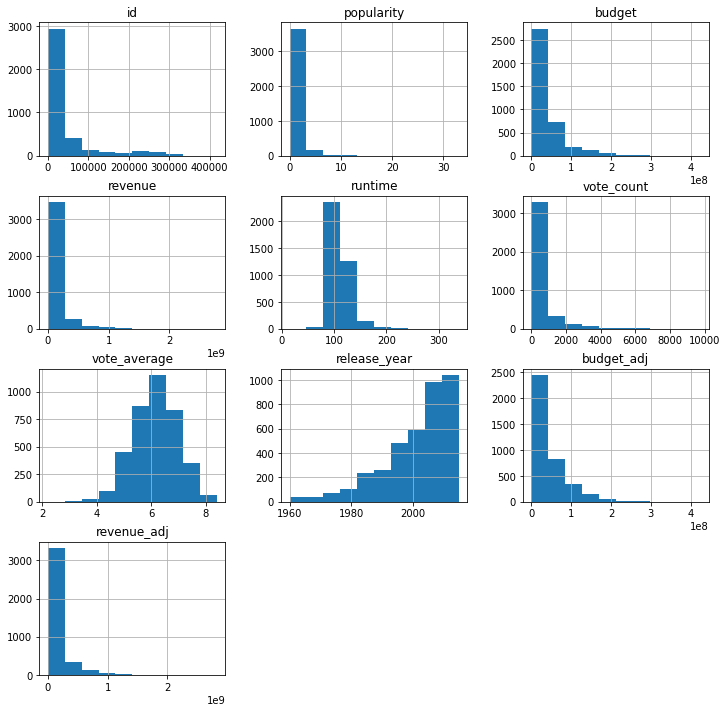

In [15]:
# see all variables histgrams to see how they distrbute
df.hist(figsize=(12,12));

we can see that only vote average has normally distribuation but other variables are not that because there are alot of data set are cut of.

### Research Question 1 : what is the top 5 highest movies in budget ?

this question will help to figure out the highest budget movie and try to cordenatie it with highest profit movie, so we can know if the budget helps in term of revenue.

In [17]:
# create data set that has only the top 5 budget movies 
df_h_budget=df.nlargest(5,'budget')
df_h_budget['original_title']

2244                              The Warrior's Way
3375    Pirates of the Caribbean: On Stranger Tides
7387       Pirates of the Caribbean: At World's End
14                          Avengers: Age of Ultron
6570                               Superman Returns
Name: original_title, dtype: object

* the highest budget movie is the warrior's way.

Text(0, 0.5, 'Budget')

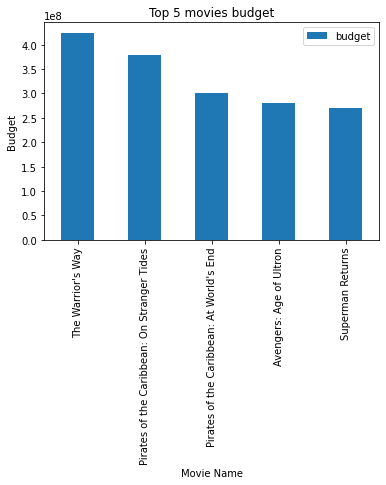

In [23]:
# plot the names with budget
df_h_budget.plot.bar(x = 'original_title', y= 'budget', title='Top 5 movies budget');
plt.xlabel('Movie Name')
plt.ylabel('Budget')

 * we can see that the top movies in term of budget are The
warrior's way, and pirates of the caribean.

### Research Question 2  : what is the top 5 highest movies in Profit ?

we will create a profit column that see how well movie did, and that will help to determine if that contribute with budget factor.

In [24]:
#create new column that has the profit value with is the revnue - budget
df['profit']= df['revenue']-df['budget']
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201


`profit columns has been added to dataset `

Text(0, 0.5, 'Profit')

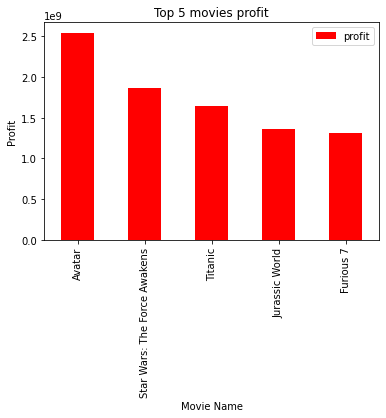

In [28]:
# create bar chart that indicat the top 5 movies in term of profit 
df.nlargest(5,'profit').plot.bar(x = 'original_title', y= 'profit', color= 'red', title='Top 5 movies profit')
plt.xlabel('Movie Name')
plt.ylabel('Profit')

` we can see that the top movies in term of profit are Avatar, and star wars. in addtion, the two top values in budget and profit are not the same.`

### Research Question 3  : what is the top 5 highest profit genra ?

here we can see if there a certin movie gerna get the highest profit share in term of all gerna.

In [31]:
# to be able to see most profit gerna we should seprate each categorly 
df['genres']=df['genres'].str.split("|",expand=True)
df['genres'].value_counts()

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64


`we can see that Drama ,Comedy , and Action are the hightst number of movie genre.`

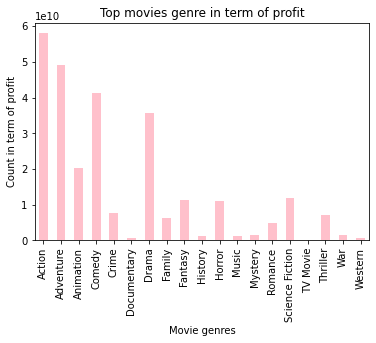

In [39]:
# Create a bar chart that shows the top genres in term of profit
df_H_P_G= df.groupby('genres')['profit'].sum()
df_H_P_G.plot.bar(color= 'pink', title='Top movies genre in term of profit')
plt.xlabel('Movie genres')
plt.ylabel('profit share of each genres');

`we can see that Action genre is taking the first place in term of profit , followed by Adventure , Comedy and Drama.`

### Research Question 4  : how movie popularties changes over years ?

here we can see how movies industry do at the last years , and how well it is doing.




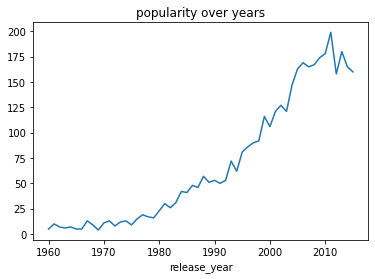

In [44]:
# create time serie chart that shows the popularity of all movies over the years.
movies_pop_o_yr=df.groupby('release_year')['popularity'].sum()
movies_pop_o_yr.plot(title='popularity over years');

* we can conculed that the populaties of movies from late 90s are getting incredably higher than before it.

### Research Question 5  : what are relationship among all variables ?

the significant of this question relay on the correlation among all variables and how each factor contribute in each other.

In [110]:
# see the relationship among e variables.
df_corr= df[['budget','revenue','vote_average','genres','popularity','runtime','profit','vote_count']]
df_corr.corr()

,budget,revenue,vote_average,popularity,runtime,profit,vote_count
budget,1.000000,0.688556,0.024169,0.446987,0.260977,0.526818,0.556937
revenue,0.688556,1.000000,0.227123,0.615535,0.250298,0.979133,0.754567
vote_average,0.024169,0.227123,1.000000,0.317866,0.351712,0.259435,0.387210
popularity,0.446987,0.615535,0.317866,1.000000,0.215092,0.596201,0.780096
runtime,0.260977,0.250298,0.351712,0.215092,1.000000,0.220238,0.273771
profit,0.526818,0.979133,0.259435,0.596201,0.220238,1.000000,0.728348
vote_count,0.556937,0.754567,0.387210,0.780096,0.273771,0.728348,1.000000


we can see that there is relationship amonge several attribute so i will plot them into charts. 

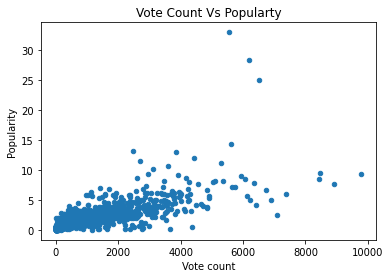

In [46]:
#see the relationship between popularity and vote_count.
df.plot.scatter(y='popularity',x='vote_count', title='Vote Count Vs Popularty')
plt.xlabel('Vote count')
plt.ylabel('Popularity');

we can see that there is a positive relationship between vote count and popularity, that mean people tend to vote for movies that are more known wheither good or bad they are.




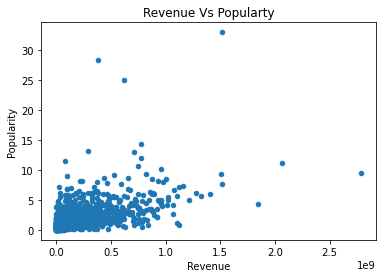

In [48]:
#see the relationship between popularity and Revenue.
df.plot.scatter(x= 'revenue', y='popularity',title='Revenue Vs Popularty')
plt.xlabel('Revenue')
plt.ylabel('Popularity');

we can see that there is a positive relationship between Revenue and popularity, that mean movies with high revnue are more likely to be popular.


<a id='conclusions'></a>
## Conclusions

we found out that highest budget movies are not the highest in term of profit. in addtion, the most movie genre that has the highest profit are Action, Adventures and Comedy.the popularity of movies are signficatly increase form year to year so the most resent movies are more likely to be known. there are also a relationship between the number of people votiong for movie and the popularity of it so the more movie is known the more people rate it.also, the popularty is related to profit do more the movie known more profit it got. the limitation that this analysis has is the number of samples got so much decreased due to the zero budget and revenue values which cut off more than a have of data set.those data set which are cut could affect the overall results. that mean there is a possiblity that results that this data conduct can not be true and the dataset is not sufficition to answer the question. to have more accurate resalts in term of relationship more statisical tests.